	19 centroids


<IPython.core.display.Javascript object>


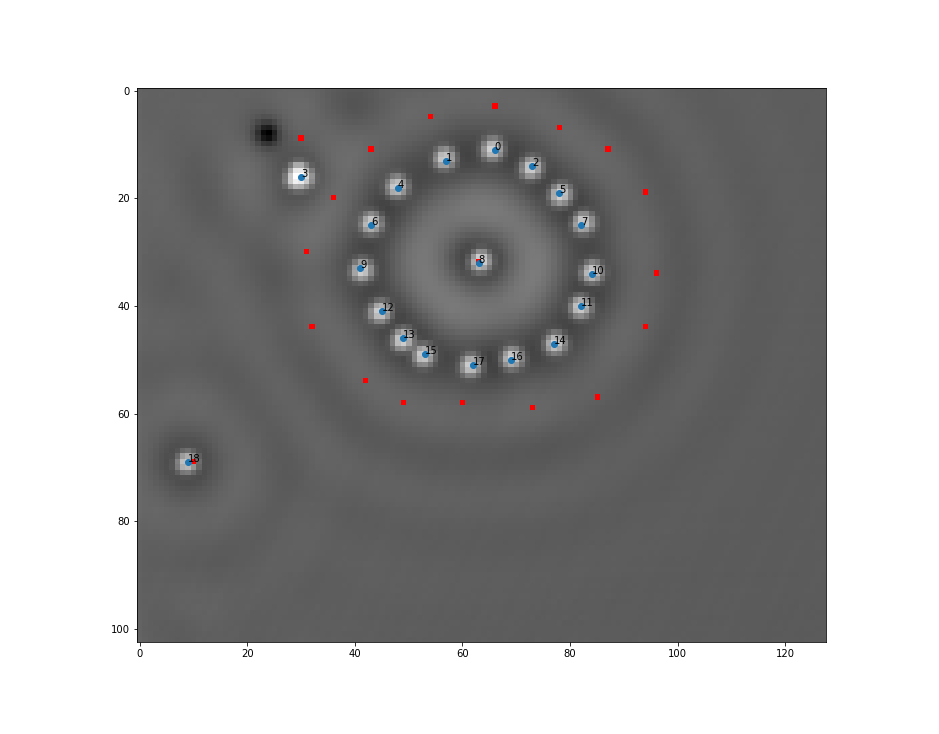

Textarea(value='[]', description='points:')

In [35]:
import matplotlib.pyplot as plt
%matplotlib notebook
from AaltoAtoms import CircCorralData

f = r"Y:\labdata\Createc\STMDATA\Ag(111)\2022-03 Co Kondo corrals\04-04\A220405.101017.dat"

C = CircCorralData(f,"label")
C.occupied = True
C.corral = True
C.get_region_centroids(diamond_size=2, sigmaclip=4)
from sklearn.preprocessing import MinMaxScaler

'''from importlib import reload
reload(plt)
'''


import numpy as np
import os
import ipywidgets as wdg
import AMRL

mat = np.random.random((5,5))
dispmat = np.stack([mat,mat,mat], axis=-1)

# Plot it
fig = plt.figure()

im = MinMaxScaler().fit_transform(C.im.flatten().reshape(-1, 1)).reshape(C.im.shape)
dispmat = np.stack([im,im,im], axis=-1)
plt.imshow(dispmat)
plt.scatter(*np.array(C.centroids).T)
for n, c in enumerate(C.centroids):
    plt.text(*c,'%d' %(n))

# List for selected pixels
selected = []

# Create a text area for displaying the selected pixels
text_area = wdg.Textarea(
    value = str(selected),
    description = "points:",
    disabled = False
)
display(text_area)

# Function to run when a pixel is clicked
def onclick(event):
    ''' Add the clicked pixel to the list of selected pixels and
    display it as red in the image.
    '''
    global selected
    x = int(event.xdata+0.5)
    y = int(event.ydata+0.5)
    if (y, x) in selected:
        im[y,x] = C.im[y,x]
        dispmat[y,x,:] = [im[y,x], im[y,x], im[y,x]]

        selected.remove((y, x))
    else:
        #im[y,x] = [1,0,0]
        dispmat[y,x,:] = [1,0,0]

        selected += [(y, x)]
    text_area.value = str(selected)  # str(dir(event))
    print(selected)
    plt.imshow(dispmat)
    fig.canvas.draw()

ka = fig.canvas.mpl_connect('button_press_event', onclick)

In [2]:
C.__dict__

{'file': 'Y:\\labdata\\Createc\\STMDATA\\Ag(111)\\2022-03 Co Kondo corrals\\04-04\\A220405.101017.dat',
 'label': 'label',
 'image_file': <createc.Createc_pyFile.DAT_IMG at 0x241ab0fe9a0>,
 'im': array([[-17.98767556, -17.98901156, -17.98932116, ..., -17.9954808 ,
         -17.99469117, -17.99408886],
        [-17.98722156, -17.98887106, -17.98995339, ..., -17.99483816,
         -17.99441148, -17.99382218],
        [-17.986549  , -17.98957613, -17.99009388, ..., -17.99472369,
         -17.99438156, -17.99391454],
        ...,
        [-17.9866856 , -17.99186047, -17.99270083, ..., -17.99717583,
         -17.99762724, -17.99675955],
        [-17.98761182, -17.99043211, -17.99197624, ..., -17.99788351,
         -17.99708997, -17.99624181],
        [-17.98638249, -17.9892249 , -17.9919125 , ..., -17.99675955,
         -17.99704575, -17.99664117]]),
 'imshape': (103, 128),
 'xPix': 103,
 'yPix': 128,
 'ang_ppx_x': 2.1877953125,
 'ang_ppx_y': 2.1877953125,
 'occupied': True,
 'corral': True

In [3]:
len(C.centroids)

19

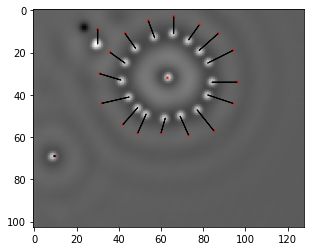

In [39]:
%matplotlib inline
for n, c in enumerate(C.centroids):
    plt.arrow(*c, *(np.array(list(reversed(selected[n])))-np.array(c)))
plt.imshow(dispmat);
plt.show()
#assert(len(selected)==len(C.centroids))